In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/kaggle/input/starwars/relatorio_rebelde_starwars.csv')

In [3]:
pd.set_option('display.max_rows', None) 

df


,nome,altura,peso,data_nascimento,planeta,especie,missao_sucesso,nivel_energia
0,Cassian Andor,1.42m,114.2kg,1977-05-19,Alderaan,Mandaloriano,não,10456
1,Leia,1.33metros,61.9Kg,19/05/1977,Naboo,Wookiee,nao,8805
2,C3PO,1.95m,120.9kg,33BBY,Dagobah,Droid,Y,8273
3,Finn,2.35m,73.7KG,"May 21, 1977",Yavin IV,Desconhecido,N,9166
4,Sabine Wren,1.35m,85.9KG,"May 21, 1977",Naboo,Droid,N,8575
5,BB-8,138 cm,106.1kg,29-11-1975,Alderaan,Yoda,Y,10714
6,Cassian Andor,222 cm,56.3kg,72BBY,Jakku,Mandaloriano,não,8401
7,Bo-Katan,210 cm,56.3KG,72BBY,Naboo,Wookiee,N,7458
8,Poe Dameron,220 cm,120.5KG,"May 21, 1977",Kashyyyk,Togruta,N,8741
9,Cassian Andor,1.85metros,128.5KG,1977-05-19,Jakku,Wookiee,no,11415


In [4]:
def padronizar_peso(peso):
    if pd.isna(peso) or str(peso).strip().lower() in ['unknown', 'n/a']:
        return np.nan
    
    peso = str(peso).strip()
    # remv unidades e caracteres não numéricos
    peso = re.sub(r'[a-zA-Z]', '', peso)
    peso = peso.strip()
    
    try:
        return float(peso)
    except:
        return np.nan

In [5]:
def padronizar_nome(nome):
    if pd.isna(nome):
        return nome
    nome = str(nome).strip()
    # Padroniza C3PO/R2D2 e pega primeiro nome
    nome = re.sub(r'^C3PO$', 'C-3PO', nome, flags=re.IGNORECASE)
    nome = re.sub(r'^R2D2$', 'R2-D2', nome, flags=re.IGNORECASE)
    nome = re.sub(r'\s.+$', '', nome)  # Remove sobrenomes
    return nome.title()

df['nome'] = df['nome'].apply(padronizar_nome)
df_sem_duplicatas = df.drop_duplicates(subset=['nome'], keep='last')
print(df_sem_duplicatas['nome'].value_counts())

nome
Mace         1
Bb-8         1
Leia         1
Palpatine    1
Cassian      1
Kylo         1
R2-D2        1
C-3Po        1
Ezra         1
Sabine       1
Obi-Wan      1
Lando        1
Jyn          1
Poe          1
Luke         1
Finn         1
Yoda         1
Bo-Katan     1
Anakin       1
Grogu        1
Chewbacca    1
Padmé        1
Rey          1
Ahsoka       1
Han          1
Qui-Gon      1
Darth        1
Name: count, dtype: int64


In [6]:

def padronizar_altura(valor):
    if pd.isna(valor):
        return np.nan
    
    valor = str(valor).strip().lower().replace(',', '.')
    
    # Expressões comuns para metros
    if 'm' in valor and 'cm' not in valor:
        try:
            altura = float(re.sub(r'[^0-9.]', '', valor))
            return round(altura, 2)
        except:
            return np.nan
    
    # Expressões comuns para centímetros (ex: "174 cm", "234")
    elif 'cm' in valor or valor.isdigit():
        try:
            altura_cm = float(re.sub(r'[^0-9.]', '', valor))
            return round(altura_cm / 100, 2)
        except:
            return np.nan
    
    return np.nan

def padronizar_peso(valor):
    if pd.isna(valor):
        return np.nan

    valor = str(valor).strip().lower().replace(',', '.')
    
    try:
        peso = float(re.sub(r'[^0-9.]', '', valor))
        return round(peso, 1)
    except:
        return np.nan

def padronizar_data(data):
    if pd.isna(data):
        return np.nan

    data = str(data).strip().lower()

    # Tratar valores nulos ou inválidos
    if data in ['unknown', 'n/a', '-', '']:
        return np.nan

    # Caso seja data do tipo "112BBY", "33 BBY", etc.
    if 'bby' in data:
        try:
            ano = re.sub(r'[^0-9]', '', data)
            return f"{ano} BBY"
        except:
            return np.nan

    # Tenta converter para datetime em diferentes formatos
    try:
        # Formato YYYY-MM-DD
        if re.match(r'^\d{4}-\d{2}-\d{2}$', data):
            return pd.to_datetime(data, format='%Y-%m-%d').strftime('%Y-%m-%d')

        # Formato DD/MM/YYYY
        elif re.match(r'^\d{2}/\d{2}/\d{4}$', data):
            return pd.to_datetime(data, format='%d/%m/%Y').strftime('%Y-%m-%d')

        # Formato DD-MM-YYYY
        elif re.match(r'^\d{2}-\d{2}-\d{4}$', data):
            return pd.to_datetime(data, format='%d-%m-%Y').strftime('%Y-%m-%d')

        # Formato textual "May 21, 1977"
        elif re.match(r'^[a-z]+ \d{1,2}, \d{4}$', data):
            return pd.to_datetime(data, format='%B %d, %Y').strftime('%Y-%m-%d')

        # Se nenhuma das regex bater, tenta parsear mesmo assim
        else:
            return pd.to_datetime(data, errors='coerce').strftime('%Y-%m-%d')
    except:
        return np.nan

def padronizar_sucesso(valor):
    if pd.isna(valor) or str(valor).strip().lower() in ['unknown', 'n/a']:
        return np.nan
    
    valor = str(valor).strip().lower()
    positivos = ['sim', 'yes', 'y', 's']
    negativos = ['não', 'nao', 'no', 'n']
    
    if valor in positivos:
        return True
    elif valor in negativos:
        return False
    else:
        return np.nan

def corrigir_especies(especie):
    if pd.isna(especie) or str(especie).strip().lower() in ['unknown', 'n/a']:
        return 'Unknown'
    
    especie = str(especie).strip().title()
    
    if especie in ['Yoda', 'Grogu']:
        return "Yoda's Species"
    elif especie == 'Desconhecido':
        return 'Unknown'
    elif especie == 'Droid':
        return 'Droid'
    elif especie == 'Wookiee':
        return 'Wookiee'
    elif especie == 'Humano':
        return 'Human'
    elif especie == 'Mandaloriano':
        return 'Mandalorian'
    elif especie == 'Togruta':
        return 'Togruta'
    else:
        return especie

def padronizar_planeta(planeta):
    if pd.isna(planeta) or str(planeta).strip().lower() in ['unknown', 'n/a', '']:
        return 'Unknown'
    
    return str(planeta).strip()

df = df.copy()
df['nome'] = df['nome'].apply(padronizar_nome)
df['altura'] = df['altura'].apply(padronizar_altura)
df['peso'] = df['peso'].apply(padronizar_peso)
df['data_nascimento'] = df['data_nascimento'].apply(padronizar_data)
df['missao_sucesso'] = df['missao_sucesso'].apply(padronizar_sucesso)
df['especie'] = df['especie'].apply(corrigir_especies)
df['planeta'] = df['planeta'].apply(padronizar_planeta)

# remover duplicatas 
df = df.drop_duplicates(subset=['nome'], keep='last')
df = df.sort_values(by='nome')

df


,nome,altura,peso,data_nascimento,planeta,especie,missao_sucesso,nivel_energia
52,Ahsoka,1.82,130.1,72 BBY,Alderaan,Droid,False,7765
76,Anakin,2.24,58.2,112 BBY,Jakku,Droid,True,9263
83,Bb-8,2.34,103.8,1977-05-19,Haruun Kal,Droid,NaN,10921
77,Bo-Katan,1.31,134.8,33 BBY,Dagobah,Yoda's Species,False,10900
92,C-3Po,2.06,110.0,NaN,Stewjon,Yoda's Species,False,7326
95,Cassian,2.20,136.9,896 BBY,Yavin IV,Droid,False,8317
73,Chewbacca,1.78,76.2,1977-05-19,Dagobah,Wookiee,True,11408
99,Darth,2.32,83.8,1977-05-21,Tatooine,Mandalorian,False,8297
91,Ezra,1.46,46.0,33 BBY,Haruun Kal,Droid,NaN,8018
81,Finn,2.11,67.6,48 BBY,Jakku,Human,False,9426


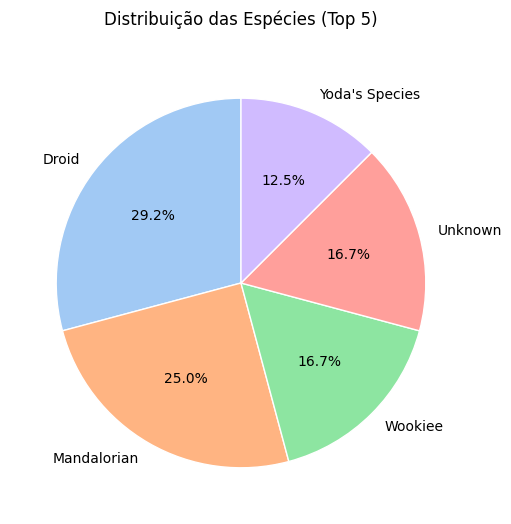

In [7]:
contagem_especies = df['especie'].value_counts()
top5 = contagem_especies.head(5)
cores = sns.color_palette('pastel')[0:len(top5)]

plt.figure(figsize=(6, 6))
plt.pie(
    top5,
    labels=top5.index,
    autopct='%.1f%%',
    startangle=90,
    colors=cores,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 10}
)
plt.title('Distribuição das Espécies (Top 5)', pad=20)
plt.show()

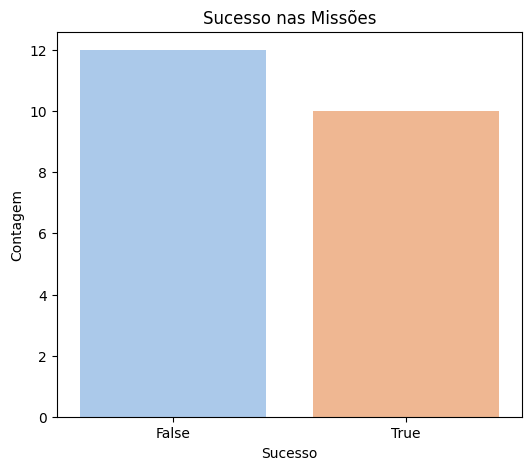

In [8]:
# Conta valores válidos
missao_counts = df['missao_sucesso'].value_counts(dropna=True)

plt.figure(figsize=(6, 5))
sns.barplot(
    x=missao_counts.index,
    y=missao_counts.values,
    palette='pastel'
)
plt.title('Sucesso nas Missões')
plt.xlabel('Sucesso')
plt.ylabel('Contagem')
plt.show()